<a href="https://colab.research.google.com/github/ObidenceNcube/Risk_Parity_Portfolio/blob/main/Risk_Parity_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Exercise Demonstrates how we can Build a Risk Parity Portfolio

1.  We will get data from yahoo finance
2.  Create a portfolio with Equal Weights
3.   Create a portfolio with a minimum return constraint 

Objective 1

In [ ]:
# Fetch Stock Price Data
#!pip install yfinance
#!pip install riskfolio-lib
import yfinance as yf
import riskfolio as rp
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") # this ensures that we ignore some Riskfolio Library warnings

In [ ]:
#Creating Tickers of interest for the portfolio
assets=['JCI', 'TGT','CMCSA', 'CPB', 'AVB', 'APA', 'MMC', 'JPM', 'ZION', 'PSA', 
         'BAX', 'BMY', 'LUV', 'PCAR', 'AAPL', 'TMO', 'DE', 'MSFT', 'HPQ', 'SEE', 
         'VZ', 'CNP', 'AMZN', 'TSLA', 'BA']
assets.sort()

In [ ]:
#Downloading Data
data = yf.download(assets, start ='2012-01-01', end = '2021-12-31')

[*********************100%***********************]  25 of 25 completed


In [ ]:
# Computing non-compounding, daily returns from the Adjusted Close Price
returns = data['Adj Close'].pct_change().dropna()

Objective 2

In [ ]:
# Setting up a Portfolio with Equal Weights
portequal = rp.Portfolio(returns=returns)
portequal.assets_stats(method_mu = 'hist', method_cov = 'hist', d = 0.94)

w_rp = portequal.rp_optimization(model='Classic', rm='MV', hist=True, rf=0, b=None) # use historical, mean-variance MV, historical scenarios hist, risk free rate rf, no constraints

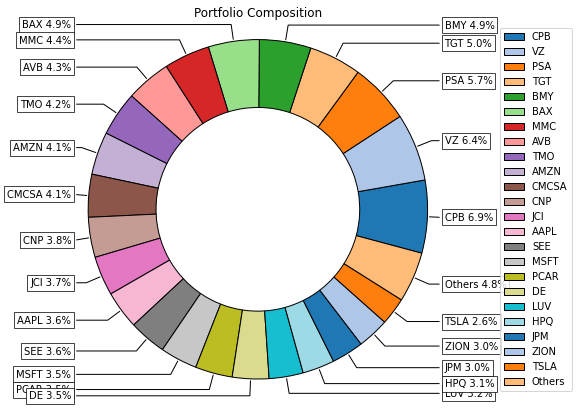

In [ ]:
# Plotting for clear visualization 
ax = rp.plot_pie(w=w_rp)

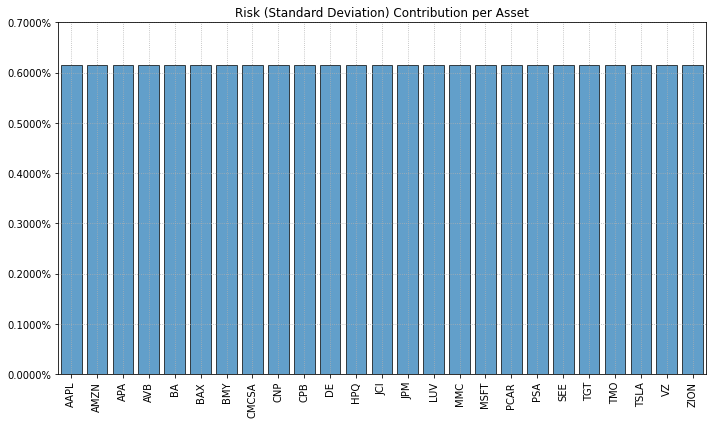

In [ ]:
# Visualize risk contribution for each ticker
ax = rp.plot_risk_con(w_rp, cov=portequal.cov, returns=portequal.returns, rm='MV', rf=0)

Objective 3

In [ ]:
# Create a portfolio with a minimum return constraint
# The main idea is to add a constraint ,so that we correct the Weights as shown in the pie chart above
# This gives high-risk stocks an advantage to push the portfolio returns higher

portequal.lowerret = 0.0008

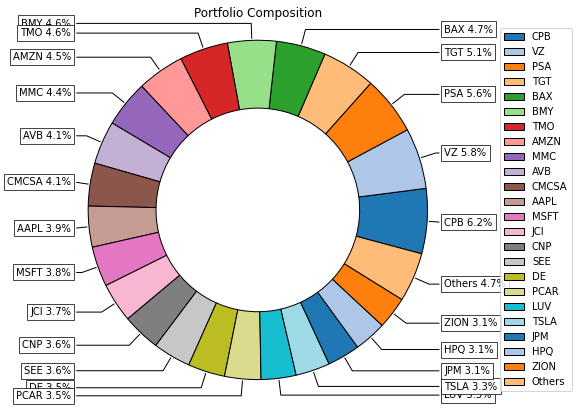

In [ ]:
# Estimate the Optimal Portfolio with Risk Parity and constraint
w_rp_c = portequal.rp_optimization(model='Classic', rm='MV', rf=0, hist=True, b=None)

ax = rp.plot_pie(w=w_rp_c)

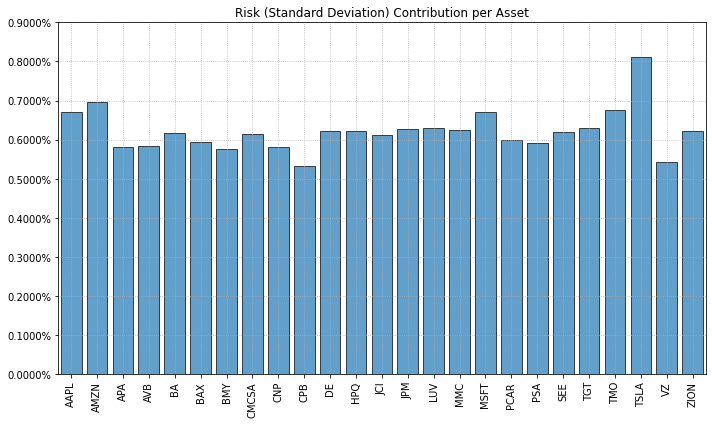

In [ ]:
# Add constraint for minimum level of expected returns
ax = rp.plot_risk_con(w_rp_c, cov=portequal.cov, returns=portequal.returns, rm='MV', rf=0)

Visualizing the piechart we notice that CPB dominates witha 6.2%, this is before employing the constraint. By adding the constraint we realise that TSLA is most favourable depicted by the barchart. This is because the risk parity figured out the optimal risk weights to hit the minimum portfolio return.

Conclusion is that Risk Parity is a great way to manage a predictable portfolio that performs consistently in most markets.